In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### dataset preparation

In [ ]:
dataset_path = '../input/dataset/dataset/'
categories = os.listdir(dataset_path)

In [ ]:
categories

In [ ]:
images = []
label = []
for category in categories:
    for each in os.listdir(dataset_path+category+'/'):
        img = cv2.imread(dataset_path + category+'/'+each)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (100, 100))
        flat = img.flatten()
        l = category[:-1]
        images.append(flat)
        label.append(l)

In [ ]:
X = np.array(images)
Y = np.array(label)

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
plt.imshow(X[589].reshape(100, 100, 3));

### shuffle the array

In [ ]:
from sklearn.utils import shuffle

In [ ]:
X, Y = shuffle(X, Y)

### split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

### creating model and training

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(gamma='auto')

In [ ]:
svc.fit(X_train, Y_train)

In [ ]:
svc.score(X_train,Y_train)

In [ ]:
Y[130]

In [ ]:
svc.predict(X[130].reshape(1, -1))

In [ ]:
svc.score(X_test, Y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [ ]:
lr.fit(X_train, Y_train)

In [ ]:
lr.score(X_test, Y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, Y_train)

In [ ]:
dtc.score(X_test, Y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train, Y_train)

In [ ]:
knn.score(X_test, Y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train, Y_train)

In [ ]:
mnb.score(X_test, Y_test)

### Online tutorial implementation

### data prep

In [ ]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

In [ ]:
p = Path('../input/dataset/dataset/')

In [ ]:
d = p.glob('*')
label_dict = {'cat':0, 'dog':1, 'horse':2, 'human':3}
img_data = []
labels = []
for folder in d:
    label = str(folder).split('/')[-1][:-1]
    for img_path in folder.glob('*.jpg'):
        img = image.load_img(img_path, target_size=(32, 32))
        img_array = image.img_to_array(img)
        img_data.append(img_array)
        labels.append(label_dict[label])
        

In [ ]:
print(len(img_data), len(labels))

In [ ]:
print(labels)

In [94]:
# convert this data into numpy array
img_data = np.array(img_data, dtype='float32')/255.0
labels = np.array(labels)

In [95]:
print(img_data.shape, labels.shape)

(808, 32, 32, 3) (808,)


In [96]:
# random shuffle our data
from sklearn.utils import shuffle
X, Y = shuffle(img_data, labels)


In [97]:
def draw_img(img):
    plt.imshow(img)
    plt.show()
    return

1


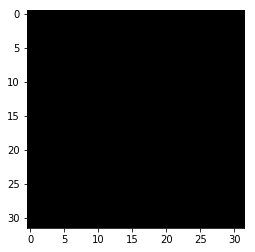

1


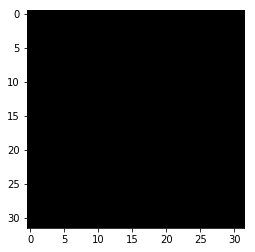

1


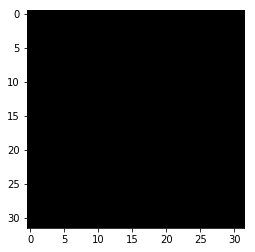

2


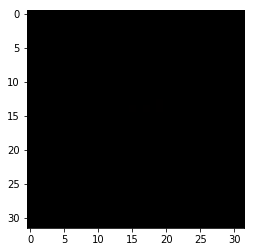

2


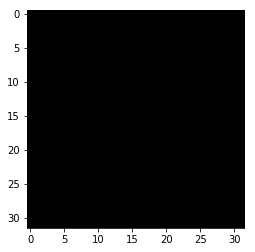

1


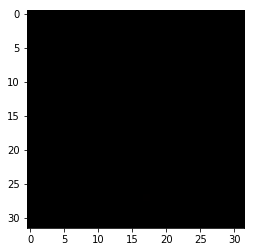

1


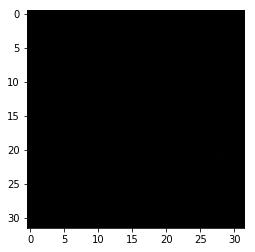

1


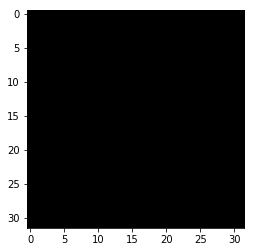

0


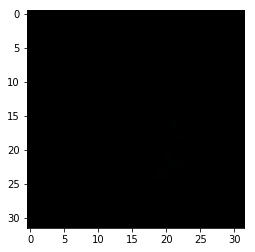

0


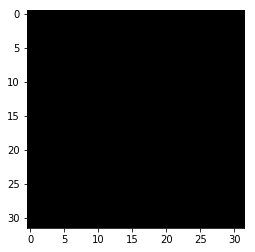

In [98]:
for i in range(10):
    print(Y[i])
    draw_img(X[i])

### SVM Classifier

In [99]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        # loss and weight zero in the begining
        self.W = 0 
        self.b = 0
    
    def hinge_loss(self, W, b, X, Y):
        loss = 0.0
        # L = 1/2*dot(W, W.T) + c*simga(max(0, 1-ti))
        loss += 0.5*np.dot(W, W.T)
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            loss += self.C*max(0, 1 - ti)
        return loss[0][0]
    
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.001, max_iter = 300):
        n_features = X.shape[1]
        n_samples = X.shape[0]
        n = learning_rate
        c = self.C
        
        # initialize the model paramete
        w = np.zeros((1,n_features))
        b = 0.0
        
        losses = []
        ids = np.arange(n_samples)
        
        # bias and weight update rule
        for i in range(max_iter):
            # training loop
            l = self.hinge_loss(w, b,  X, Y)
            losses.append(l)
            
            # we will use mini batch method (as recommended in tha paper)
            for batch_start in range(0, n_samples, batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start, batch_start+batch_size):
                    if j < n_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(w, X[i].T) + b)
                        if ti >= 1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
            # gradient for the batch is ready update the W, B
            w = w - n*w + n*gradw
            b = b + n*gradb
        
        self.W = w
        self.b = b
        
        return w, b, losses
        

### we need to convert our data for one vs one classification

In [100]:
# flatten the image first
m = X.shape[0]
X = X.reshape((m, -1))
print(X.shape, Y.shape)

(808, 3072) (808,)


In [101]:
CLASSES = np.unique(Y)

In [102]:
type(CLASSES)

numpy.ndarray

In [103]:
def class_wise_data(x, y):
    data = {}
    for i in range(len(CLASSES)):
        data[i] = []
    for i in range(m):
        data[y[i]].append(x[i])
    # convert the keys in numpy array
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [104]:
print(X.shape, Y.shape)
data = class_wise_data(X, Y)

(808, 3072) (808,)


In [108]:
"""print(data[0].shape)
print(data[1].shape)
print(data[2].shape)
print(data[3].shape)"""

'print(data[0].shape)\nprint(data[1].shape)\nprint(data[2].shape)\nprint(data[3].shape)'

In [109]:
def get_dp_for_SVM(d1, d2):
    """combines data of two classes into single matrix"""
    l1, l2 = d1.shape[0], d2.shape[0]
    n_samples = l1 + l2
    n_features = d1.shape[1]
    data_pair =  np.zeros((n_samples, n_features))
    data_labels = np.zeros((n_samples,))
    data_pair[:l1, :] = d1
    data_pair[l1:, :] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair, data_labels
    

### training NC2 SVM

In [110]:
svm = SVM()

In [115]:
def trainSVM(x, y):
    svm_classifiers = {}
    for i in range(len(CLASSES)):
        svm_classifiers[i] = {}
        for j in range(i+1, len(CLASSES)):
            xpair, ypair = get_dp_for_SVM(data[i], data[j])
            wts, b, loss = svm.fit(xpair, ypair)
            svm_classifiers[i][j] = (wts, b)
    
    return svm_classifiers
            
            
    

In [116]:
svm_classifiers = trainSVM(X, Y)

In [117]:
svm_classifiers[0][1]

(array([[0.00137309, 0.00147257, 0.00114541, ..., 0.00138841, 0.00154919,
         0.00079648]]), 0.9940000000000008)

### making predictions

In [126]:
def binary_pred(x, w, b):
    z = np.dot(x, w.T) + b
    print(z)
    if z > 0:
        return 1
    else:
        return -1

def predict(x):
    count = np.zeros((len(CLASSES), ))
    for i in range(len(CLASSES)):
        for j in range(i+1, len(CLASSES)):
            w, b = svm_classifiers[i][j]
            # take the majority predictions
            z = binary_pred(x, w, b)
            if z == 1:
                count[j] += 1
            else:
                count[i] += 1
    print(count)
    return

In [130]:
predict(X[13])

[1.001813]
[1.00397221]
[1.00341029]
[1.00397221]
[1.00341029]
[1.00341029]
[0. 1. 2. 3.]
